# Import libraries
U know... just importing required libraries.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import csv

# Setup the csv path of a dataset
Please cheak the csv sample form from 'Dataset/csv/wiki_dataset.csv' to avoid unexpected results OuOb.

In [2]:
# path = '../../Results/CLIP_Zeroshot_ALL.csv'
path = '../../Results/YearCLIPv1.csv'
df = pd.read_csv(path)

# Show the comparison
Scatter the points (prediction , ground-truth) and draw a ideal red line.

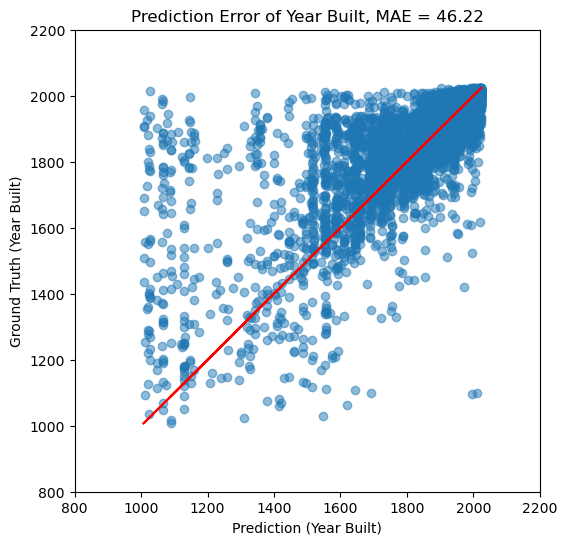

In [3]:
pred = df['pred'].to_numpy()
gt = df['year'].to_numpy()

plt.figure(figsize=(6,6))
plt.scatter(pred, gt, alpha=0.5)
plt.plot(pred, pred, color='red')

plt.xlim(800, 2200)
plt.ylim(800, 2200)

plt.title(f"Prediction Error of Year Built, MAE = {np.mean(np.abs(pred-gt)):.2f}")
plt.xlabel('Prediction (Year Built)')
plt.ylabel('Ground Truth (Year Built)')

plt.show()

# Show the difference
Plot a histogram to visualize the difference between prediction and ground-truth.

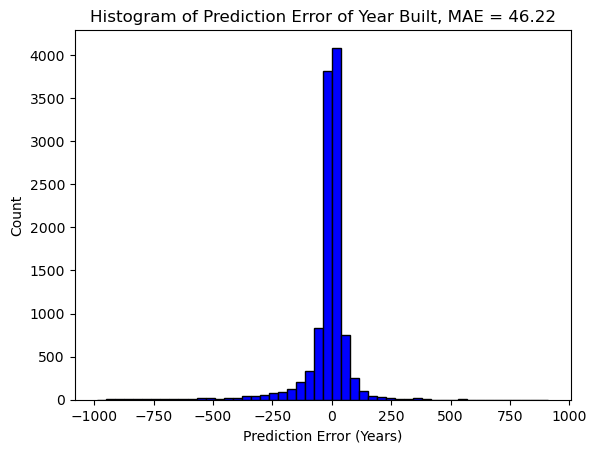

In [4]:
errors = df['diff'].to_numpy()

plt.hist(errors, bins=50, color='blue', edgecolor='black')

plt.title(f"Histogram of Prediction Error of Year Built, MAE = {np.mean(np.abs(errors)):.2f}")
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')

plt.show()

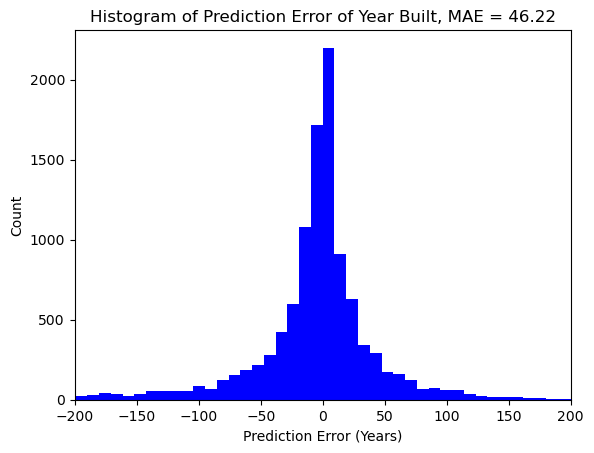

In [5]:
errors = df['diff'].to_numpy()

plt.hist(errors, bins=200, color='blue')

plt.title(f"Histogram of Prediction Error of Year Built, MAE = {np.mean(np.abs(errors)):.2f}")
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')

plt.xlim(-200, 200)

plt.show()

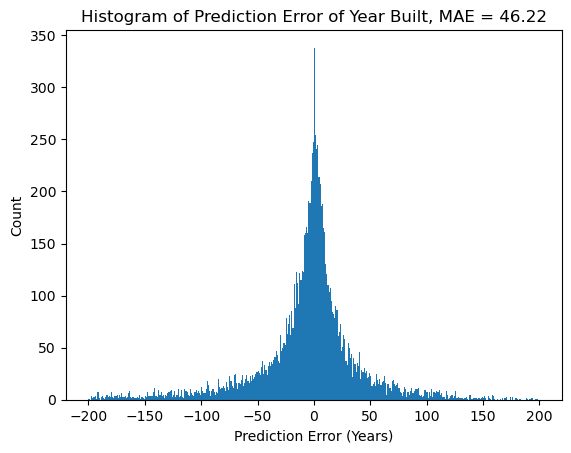

In [6]:
errors = df['diff'].to_numpy()

plt.hist(errors, bins=range(-200,200+1))

plt.title(f"Histogram of Prediction Error of Year Built, MAE = {np.mean(np.abs(errors)):.2f}")
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')

plt.show()

# TOP100 worst prediction
Display top100 prediction that miss the most.

In [7]:
def show_worst_pred(top_100_df):
    img_folder = '../../Dataset/images/'

    fig, axes = plt.subplots(10, 10, figsize=(20, 20))
    fig.suptitle("TOP 100 Year Prediction Errors\n", fontsize=20)

    for idx, (index, row) in enumerate(top_100_df.iterrows()):
        ax = axes[idx // 10, idx % 10]
        img = mpimg.imread(img_folder + row['name'])
        ax.imshow(img)
        ax.set_title(f"Year: {row['year']}, Pred: {row['pred']}", fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

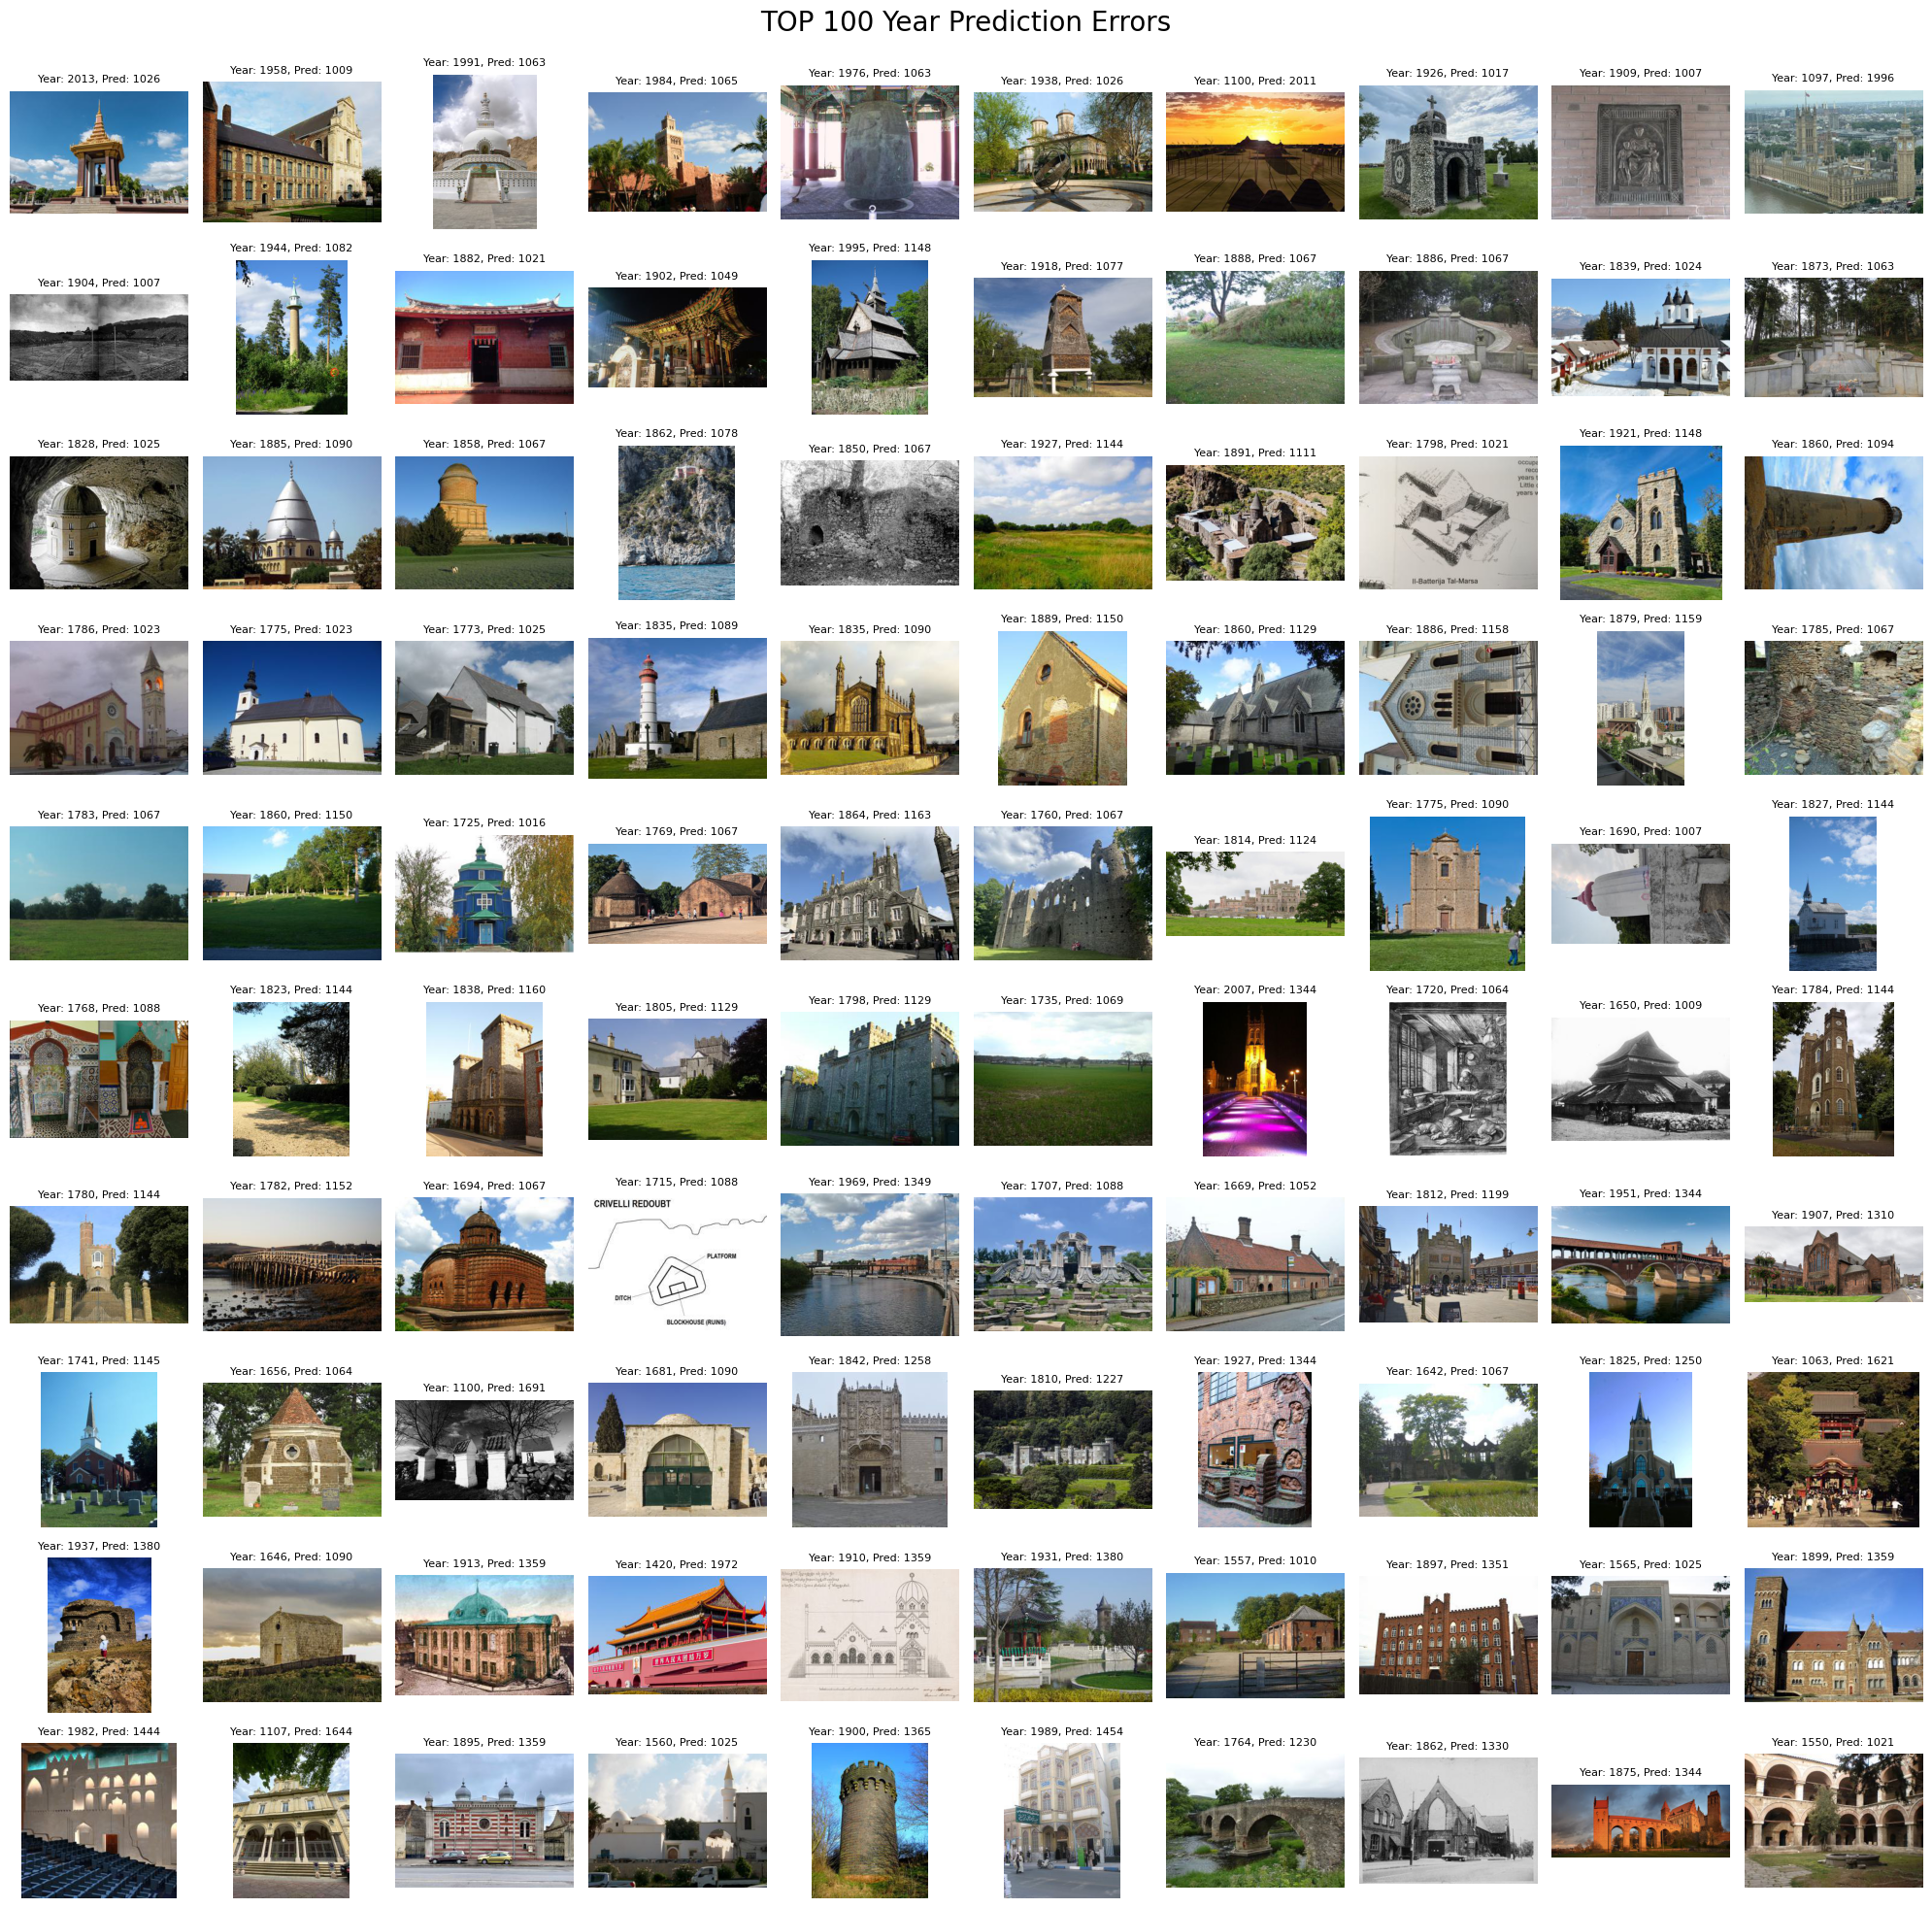

In [8]:
abs_df = df.copy()
abs_df['diff'] = abs_df['diff'].abs()

show_worst_pred(abs_df.nlargest(100, 'diff'))
# show_worst_pred(df.nsmallest(100, 'diff'))
# show_worst_pred(df.nlargest(100, 'diff'))

# Interval Performance
Compute the accuracy within different intervals.

In [9]:
abs_errors = np.array(abs_df['diff'].to_numpy())
interval = [5,20,50,100]

for i in interval:
    print(f"[{i}] {np.sum(abs_errors <= i) / len(abs_errors) * 100:.2f}%")

[5] 23.15%
[20] 55.49%
[50] 77.58%
[100] 89.20%


# Popularity (Views) and Prediction
It indicates whether the predictions are susceptible to the building's popularity.

We assume that the more famous a building is, the higher the number of views on the website will be.

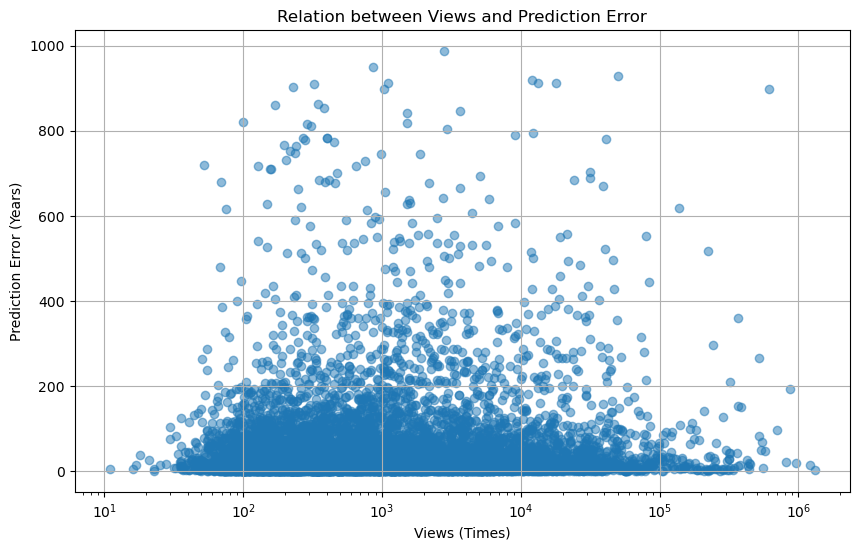

In [10]:
test_df = pd.read_csv('../../Dataset/csv/test.csv')

plt.figure(figsize=(10, 6))
plt.scatter(test_df['Views'], abs_df['diff'], alpha=0.5)

plt.xscale('log')
plt.title('Relation between Views and Prediction Error')
plt.xlabel('Views (Times)')
plt.ylabel('Prediction Error (Years)')
plt.grid(True)
plt.show()

This shows the accuracy within 5 years in each interval of views.

In [11]:
bins = [0, 1e2, 1e3, 1e4, 1e5, np.inf]
labels = ['<1e2', '1e2-1e3', '1e3-1e4', '1e4-1e5', '>1e5']

test_df['Interval'] = pd.cut(test_df['Views'], bins=bins, labels=labels, right=False)
result = abs_df[abs_df['diff'] <= 5].groupby(test_df['Interval'],observed=True).size()
result /= test_df.groupby('Interval',observed=True).size()
result = result.apply(lambda x: f'{x * 100:.2f}%')

print(result)


Interval
<1e2       25.49%
1e2-1e3    23.61%
1e3-1e4    22.93%
1e4-1e5    19.74%
>1e5       20.18%
dtype: object
